In [38]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors
import scipy.stats

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [39]:
def geo_idx(dd, dd_array):
   """
     search for nearest decimal degree in an array of decimal degrees and return the index.
     np.argmin returns the indices of minium value along an axis.
     so subtract dd from all values in dd_array, take absolute value and find index of minium.
    """
   geo_idx = (numpy.abs(dd_array - dd)).argmin()
   return geo_idx

In [40]:
LA_lat = 34.0522
LA_lon = 118.2437 # deg west
LA_lon = 180. + (180-LA_lon)

OD_lat = 39.5380
OD_lon = 121.4831 # deg west
OD_lon = 360 - OD_lon

SF_lat = 37.7749
SF_lon = 122.4194
SF_lon = 360 - SF_lon

In [41]:
working_dir = '/Users/baird/google_drive/_data_analyzed/attribution_2017/storm_counting/'
ca_latlon_regional_indices_array = numpy.load(working_dir + 'ca_latlon_regional_indices_array.npy')
ca_latlon_indices_array = numpy.load(working_dir + 'ca_latlon_indices_array.npy')

ca_latlon_array = numpy.load(working_dir + 'ca_latlon_array.npy')

print(ca_latlon_array.shape)

(65, 2)


In [42]:
lat_unique = numpy.unique(ca_latlon_array[:,0])
lon_unique = numpy.unique(ca_latlon_array[:,1])

LA_model_lat = lat_unique[geo_idx(LA_lat, lat_unique)]
LA_model_lon = lon_unique[geo_idx(LA_lon, lon_unique)]

SF_model_lat = lat_unique[geo_idx(SF_lat, lat_unique)]
SF_model_lon = lon_unique[geo_idx(SF_lon, lon_unique)]

OD_model_lat = lat_unique[geo_idx(OD_lat, lat_unique)]
OD_model_lon = lon_unique[geo_idx(OD_lon, lon_unique)]

In [44]:
working_dir = '/Users/baird/google_drive/_data_analyzed/attribution_2017/storm_counting/hist_rcp/'
#threshold=0.0
#threshold=0.1
#threshold=0.5
threshold=1.0
#threshold=5.0
#threshold=10.0

# Open preindustrial control info

In [45]:
year_start_pic = 402 #time_subsets[chunk,0]
year_end_pic = 2200 #time_subsets[chunk,1]

# create season strings
years_pic = numpy.arange(year_start_pic, year_end_pic+1, 1).astype(numpy.int)
half_years_pic = numpy.arange(year_start_pic+0.75, year_end_pic, 1)
#season_strings_pic = numpy.empty(years.size-1, dtype=numpy.str)

season_strings_pic = [str(years_pic[i])+'-'+str(years_pic[i+1]) for i in range(years_pic.size-1)]
member_strings_pic = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_pic=year_end_pic-year_start_pic

In [46]:
# now find where these locations are in the full array
OD_latlon_idx = numpy.where( (OD_model_lat==ca_latlon_array[:,0])&(OD_model_lon==ca_latlon_array[:,1]) )[0]
SF_latlon_idx = numpy.where( (SF_model_lat==ca_latlon_array[:,0])&(SF_model_lon==ca_latlon_array[:,1]) )[0]
LA_latlon_idx = numpy.where( (LA_model_lat==ca_latlon_array[:,0])&(LA_model_lon==ca_latlon_array[:,1]) )[0]

In [47]:
filename_OD = 'member_005_latidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[OD_latlon_idx,0][0])+'_lonidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[OD_latlon_idx,1][0])+'_years_'+'{:04d}'.format(year_start_pic)+'-'+'{:04d}'.format(year_end_pic)+'_threshold_'+str(threshold)+'mmday.npy'
filename_SF = 'member_005_latidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[SF_latlon_idx,0][0])+'_lonidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[SF_latlon_idx,1][0])+'_years_'+'{:04d}'.format(year_start_pic)+'-'+'{:04d}'.format(year_end_pic)+'_threshold_'+str(threshold)+'mmday.npy'
filename_LA = 'member_005_latidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[LA_latlon_idx,0][0])+'_lonidx_'+'{:02d}'.format(ca_latlon_regional_indices_array[LA_latlon_idx,1][0])+'_years_'+'{:04d}'.format(year_start_pic)+'-'+'{:04d}'.format(year_end_pic)+'_threshold_'+str(threshold)+'mmday.npy'

working_dir = '/Users/baird/google_drive/_data_analyzed/attribution_2017/storm_counting/preindustrial/'
dict_OD = numpy.load(working_dir + filename_OD).item()
dict_SF = numpy.load(working_dir + filename_SF).item()
dict_LA = numpy.load(working_dir + filename_LA).item()

# Open hist and RCP8.5 info

In [48]:
year_start_hist = 1920 #time_subsets[chunk,0]
year_end_hist = 2010 #time_subsets[chunk,1]

# create season strings
years = numpy.arange(year_start_hist, year_end_hist+1, 1).astype(numpy.int)
half_years_hist = numpy.arange(year_start_hist+0.75, year_end_hist, 1)

season_strings_hist = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_hist = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_hist=year_end_hist-year_start_hist

In [49]:
year_start_rcp = 1920
year_end_rcp = 2100

# create season strings
years = numpy.arange(year_start_rcp, year_end_rcp+1, 1).astype(numpy.int)
half_years_rcp = numpy.arange(year_start_rcp+0.75, year_end_rcp, 1)

season_strings_rcp = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings_rcp = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons_rcp=year_end_rcp-year_start_rcp

In [50]:
ensemble_members = numpy.hstack((numpy.arange(1,36), numpy.arange(101,106)))
ensemble_names = ['{:03d}'.format(i) for i in ensemble_members]
print(ensemble_names)

['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '101', '102', '103', '104', '105']


In [51]:
working_dir = '/Users/baird/google_drive/_data_analyzed/attribution_2017/storm_counting/hist_rcp/'

dict_OD_list_hist_rcp = []
dict_SF_list_hist_rcp = []
dict_LA_list_hist_rcp = []
for i in range(len(ensemble_names)):
    ensemble_member=ensemble_names[i]
    #member_101_latidx_137_lonidx_191_years_1920-2100_threshold_0.1mmday.npy
    filename_OD = 'member_'+ensemble_member+'_latidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,1][0])+'_years_'+'1920'.format(year_start_hist)+'-'+'2100'.format(year_end_hist)+'_threshold_'+str(threshold)+'mmday.npy'
    filename_SF = 'member_'+ensemble_member+'_latidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,1][0])+'_years_'+'1920'.format(year_start_hist)+'-'+'2100'.format(year_end_hist)+'_threshold_'+str(threshold)+'mmday.npy'
    filename_LA = 'member_'+ensemble_member+'_latidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,1][0])+'_years_'+'1920'.format(year_start_hist)+'-'+'2100'.format(year_end_hist)+'_threshold_'+str(threshold)+'mmday.npy'
    dict_OD_list_hist_rcp.append(numpy.load(working_dir + filename_OD).item())
    dict_SF_list_hist_rcp.append(numpy.load(working_dir + filename_SF).item())
    dict_LA_list_hist_rcp.append(numpy.load(working_dir + filename_LA).item())

print('_latidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[OD_latlon_idx,1][0]))
print('_latidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[SF_latlon_idx,1][0]))
print('_latidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,0][0])+'_lonidx_'+'{:03d}'.format(ca_latlon_indices_array[LA_latlon_idx,1][0]))

_latidx_137_lonidx_191
_latidx_136_lonidx_190
_latidx_132_lonidx_193


In [52]:
#print(dict_LA['402-403'].keys())
#dict_keys(['storm_count', 'precipitation_days', 'seasonal_total', 'storm_length_list', 'storm_magnitude_list'])

print(len(dict_LA_list_hist_rcp))
#print(dict_LA_list_hist_rcp[0].keys())

40


# Import storm accumulation data

In [53]:
dict_hist_rcp = dict_OD_list_hist_rcp; dict_pic = dict_OD; location='OD'
dict_hist_rcp = dict_SF_list_hist_rcp; dict_pic = dict_SF; location='SF'
#dict_hist_rcp = dict_LA_list_hist_rcp; dict_pic = dict_LA; location='LA'

storm_magnitude_list_list_hist = []
for i in range(len(ensemble_names)):
    storm_magnitude_list = [dict_hist_rcp[i][s]['storm_magnitude_list'] for s in season_strings_hist]
    storm_magnitude_list = numpy.array([item for sublist in storm_magnitude_list for item in sublist])  
    storm_magnitude_list_list_hist.append(storm_magnitude_list)
storm_magnitude_list_hist = numpy.array([item for sublist in storm_magnitude_list_list_hist for item in sublist])

storm_magnitude_list_list_rcp = []
for i in range(len(ensemble_names)):
    storm_magnitude_list = [dict_hist_rcp[i][s]['storm_magnitude_list'] for s in season_strings_rcp]
    storm_magnitude_list = numpy.array([item for sublist in storm_magnitude_list for item in sublist])  
    storm_magnitude_list_list_rcp.append(storm_magnitude_list)
storm_magnitude_list_rcp = numpy.array([item for sublist in storm_magnitude_list_list_rcp for item in sublist])

storm_magnitude_list_pic = [dict_pic[s]['storm_magnitude_list'] for s in season_strings_pic]
storm_magnitude_list_pic = numpy.array([item for sublist in storm_magnitude_list_pic for item in sublist])

In [54]:
# in preindustrial control
percentile_list = [50,80,90,95,97,98,99,99.9,99.99,99.999]
values_pic = [numpy.percentile(storm_magnitude_list_pic, i) for i in percentile_list]
n_exceedances_avg_pic = [numpy.sum(storm_magnitude_list_pic>values_pic[i])/((year_end_pic-year_start_pic)/len(ensemble_names)) for i in range(len(values_pic))]
n_events_pic = [numpy.sum(storm_magnitude_list_pic>=values_pic[i]) for i in range(len(values_pic))]

# in historial
percentiles_hist = [scipy.stats.percentileofscore(storm_magnitude_list_hist, i) for i in values_pic]

# in future
percentiles_rcp = [scipy.stats.percentileofscore(storm_magnitude_list_rcp, i) for i in values_pic]

#values_dict = {'percentile_list':percentile_list, 'values_pic':values_pic, 'percentiles_hist':percentiles_hist, 'percentiles_rcp':percentiles_rcp}
#values_df_accumulation = pandas.DataFrame(values_dict)
#values_df_accumulation.head(10)

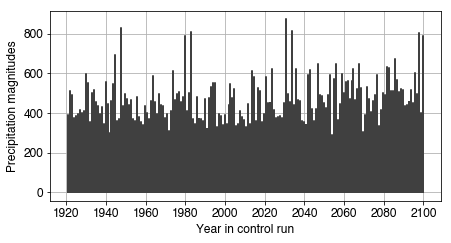

In [55]:
# now count the number of events that happen in the RCP data set
# for each season, count number of events gte the value in the pic

fontsize=12

storm_magnitude_list_allseasons = []
for s in range(len(season_strings_rcp)):
    storm_magnitude_list = [dict_hist_rcp[i][season_strings_rcp[s]]['storm_magnitude_list'] for i in range(len(ensemble_names))]
    storm_magnitude_list = [item for sublist in storm_magnitude_list for item in sublist]
    storm_magnitude_list_allseasons.append(storm_magnitude_list)

fig = mp.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)
for t in range(half_years_rcp.size):
    ax.plot([half_years_rcp[t]]*len(storm_magnitude_list_allseasons[t]), storm_magnitude_list_allseasons[t], color='0.25')

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Precipitation magnitudes', fontsize=fontsize)
#ax.set_xticks(numpy.arange(400,2201,300))#[400,500,750,1000,1250,1500,1750,2000,2200])
#ax.set_yticks([0,250,500,750,1000,1250,1500])
#ax.set_xlim(300,2300)
ax.set_xticks(numpy.arange(1920,2101,20))

ax.grid()
ax.set_axisbelow(True)

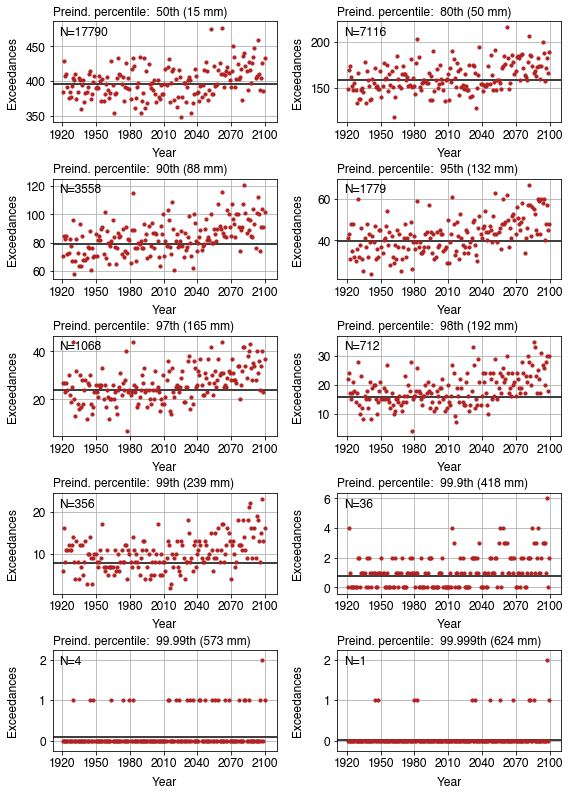

In [59]:
# now cycle through each season and count the number of storms that surpasses the percentiles above
# now count the number of events that happen in the RCP data set
# for each season, count number of events gte the value in the pic

fontsize=12

storm_magnitude_list_allseasons = []
for s in range(len(season_strings_rcp)):
    storm_magnitude_list = [dict_hist_rcp[i][season_strings_rcp[s]]['storm_magnitude_list'] for i in range(len(ensemble_names))]
    storm_magnitude_list = [item for sublist in storm_magnitude_list for item in sublist]
    storm_magnitude_list_allseasons.append(storm_magnitude_list)

fig = mp.figure(figsize=(8,11))

rcp_count_list = []

for perc in [0,1,2,3,4,5,6,7,8,9]:
    rcp_count=0
    ax = fig.add_subplot(5,2,perc+1)
    percentile_value = values_pic[perc]

    for t in range(half_years_rcp.size):
        storm_magnitude_list = numpy.array(storm_magnitude_list_allseasons[t])
        yval = numpy.sum(numpy.array(storm_magnitude_list>percentile_value))
        rcp_count+=yval
        ax.scatter(half_years_rcp[t], yval, s=10, color='firebrick', zorder=2)
        #ax.plot([half_years_rcp[t]]*len(storm_magnitude_list_allseasons[t]), storm_magnitude_list_allseasons[t], color='0.25')

    rcp_count_list.append(rcp_count)
    ax.tick_params(labelsize=fontsize)
    ax.set_xlabel('Year', fontsize=fontsize)
    ax.set_ylabel('Exceedances', fontsize=fontsize)
    ax.text(s='Preind. percentile:  '+str(percentile_list[perc])+'th ('+'{:.0f}'.format(percentile_value)+' mm)', x=0.0, y=1.03, transform=ax.transAxes, va='bottom', ha='left', fontsize=fontsize)
    ax.set_xticks(numpy.arange(1920,2101,30))
    ax.get_yaxis().set_label_coords(-0.15,0.5)
    ax.get_xaxis().set_label_coords(0.5,-0.25)
    
    ax.axhline(n_exceedances_avg_pic[perc], lw=2, c='0.25', zorder=1)
    #ax.text(s=str(n_exceedances_avg_pic[perc]), x=2120, y=n_exceedances_avg_pic[perc], ha='left', va='center', fontsize=fontsize)

    ax.text(s='N='+str(n_events_pic[perc]), x=0.03, y=0.95, transform=ax.transAxes, ha='left', va='top', fontsize=fontsize, zorder=1)
    ax.grid()
    ax.set_axisbelow(True)
    if perc in [8,9]:
        ax.set_yticks([0,1,2])
        ax.set_ylim(-0.25,2.25)

fig.tight_layout(w_pad=1.5, h_pad=1.5)
mp.savefig('./figs/number_of_exceedances_storm_accumulations_hist_rcp85_'+location+'_threshold_'+str(threshold)+'mmday.pdf', transparent=True, bbox_inches='tight')

['14.9', '50.0', '87.7', '131.7', '165.2', '191.9', '239.2', '418.4', '572.9', '624.3']


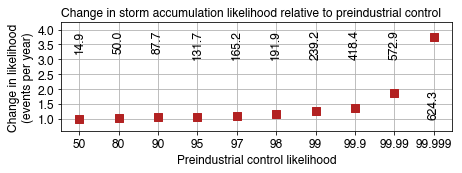

In [69]:
n_events_pic = numpy.array(n_events_pic)
rcp_count_list = numpy.array(rcp_count_list)

pic_per_year = n_events_pic/1798.
rcp_per_year = rcp_count_list/(180*40)

inc_likelihood_per_year = []
for i in range(len(values_pic)):
    #print('====='+str(values_pic[i])+'=====')
    #print(pic_per_year[i], rcp_per_year[i])
    inc_likelihood_per_year.append(rcp_per_year[i]/pic_per_year[i])

fontsize=12

fig = mp.figure(figsize=(7,2))

ax = fig.add_subplot(111)

xvals = numpy.arange(1,len(values_pic)+1)
ax.scatter(xvals, inc_likelihood_per_year, s=50, marker='s', c='firebrick')
ax.tick_params(labelsize=fontsize)
ax.set_xticklabels([str(i) for i in percentile_list])
ax.set_xticks(numpy.arange(1,len(values_pic)+1))
ax.set_yticks([1,1.5,2, 2.5, 3, 3.5, 4])
ax.set_ylim(0.6,4.25)
ax.set_ylabel('Change in likelihood\n(events per year)', fontsize=fontsize)
ax.set_xlabel('Preindustrial control likelihood', fontsize=fontsize)
#ax.set_ylim(0.85,2.4)

ax.text(s='Change in storm accumulation likelihood relative to preindustrial control', x=0.0, y=1.03, transform=ax.transAxes, ha='left', va='bottom', fontsize=fontsize)
a=['{:.1f}'.format(value) for value in values_pic]

value_strings = ['{:.1f}'.format(value) for value in values_pic]
print(value_strings)
for val in range(len(value_strings)):
    if val in[0,1,2,3,4,5,6,7,8]:
        ax.text(s=value_strings[val], x=xvals[val], y=4.0, va='top', ha='center', rotation=90, fontsize=fontsize)
    else:
        ax.text(s=value_strings[val], x=xvals[val], y=1.0, va='bottom', ha='center', rotation=90, fontsize=fontsize)

ax.grid()
ax.set_axisbelow(True)

fig.savefig('./figs/storm_accumulations_RATIO_change_likelihood_threshold_'+str(threshold)+'.pdf', transparent=True, bbox_inches='tight')